In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Read in the data

df = pd.read_csv('/Users/sawda/Documents/Datasets/movies.csv', encoding = "ISO-8859-1")

In [2]:
# Let's look at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986


In [3]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
writer - 0.0%
year - 0.0%


In [4]:
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
writer      0
year        0
dtype: int64

In [5]:
# Data Types of our columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
writer       object
year          int64
dtype: object

<AxesSubplot:>

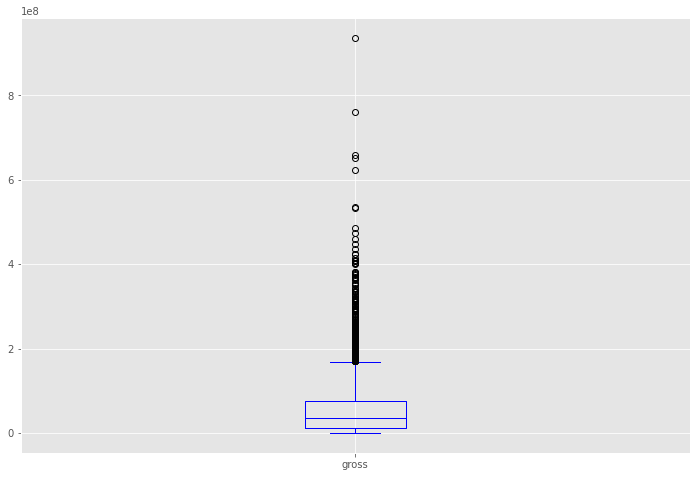

In [41]:
# Check for Outliers

df.boxplot(column=['gross'], color = "blue")

In [8]:
# Change the data type of columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,2016-07-13,127,7.0,Bryan Cranston,Ellen Sue Brown,2016
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,2016-01-22,102,6.0,Robert De Niro,John Phillips,2016
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,2016-09-23,87,6.8,Andy Samberg,Nicholas Stoller,2016
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,2016-06-17,107,6.3,Dwayne Johnson,Ike Barinholtz,2016


In [9]:
# In some data, year released and year do not match so we'll create the correct year column

df['year_correct'] = df['released'].astype(str).str[:4]

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,year_correct
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,2016-07-13,127,7.0,Bryan Cranston,Ellen Sue Brown,2016,2016
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,2016-01-22,102,6.0,Robert De Niro,John Phillips,2016,2016
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,2016-09-23,87,6.8,Andy Samberg,Nicholas Stoller,2016,2016
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,2016-06-17,107,6.3,Dwayne Johnson,Ike Barinholtz,2016,2016


In [10]:
# Order our Data 

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,year_correct
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,Zentropa Entertainments,Denmark,Kristian Levring,Drama,5000,La salvación,R,2015-02-27,92,6.7,Mads Mikkelsen,Anders Thomas Jensen,2014,2015
1074,0,Balboa Entertainment,Denmark,Nicolas Winding Refn,Crime,4440,Pusher,NOT RATED,1996-08-30,105,7.4,Kim Bodnia,Jens Dahl,1996,1996
2311,47000000,Pan Européenne,Belgium,Jaco Van Dormael,Drama,3600,Mr. Nobody,R,2013-09-26,141,7.9,Jared Leto,Jaco Van Dormael,2009,2013
1466,5000000,Copperheart Entertainment,Canada,John Fawcett,Drama,2554,Feroz,UNRATED,2001-05-18,108,6.8,Emily Perkins,Karen Walton,2000,2001


In [9]:
# If you want to explore all rows in teh dataset run this

pd.set_option('display.max_rows', None)

In [11]:
# Drop all the duplicates

df['company'].drop_duplicates().sort_values(ascending = False)

2422                         micro_scope
1233         Zucker Brothers Productions
1454             Zentropa Entertainments
184                 Zenith Entertainment
2191                     Zazen Produções
                      ...               
1682                        2 Loop Films
2894    1984 Private Defense Contractors
1603                       1492 Pictures
1608                           120 Films
1789     "DIA" Productions GmbH & Co. KG
Name: company, Length: 897, dtype: object

#### Our Hypothesis is

- Budget high correlation
- Company high correlation

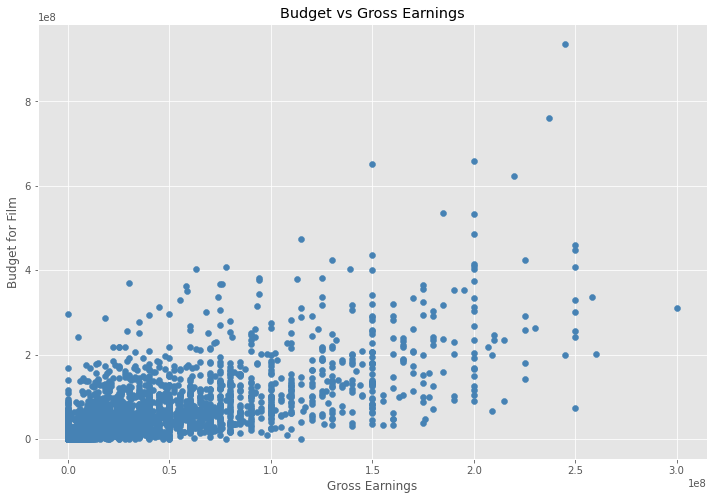

In [14]:
# Scatter plot with budget vs gross revenue

plt.scatter(x = df['budget'], y = df['gross'], c="steelblue")

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [12]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,year_correct
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012,2012


<AxesSubplot:xlabel='budget', ylabel='gross'>

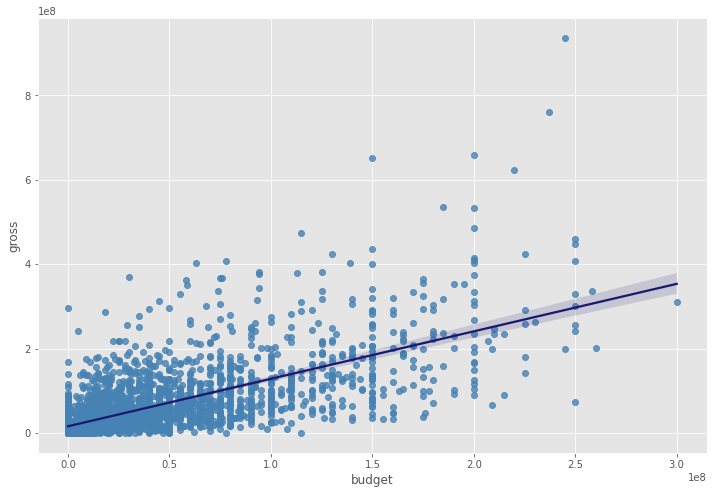

In [15]:
# Plot the budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "steelblue"}, line_kws = {"color": "midnightblue"})

#### Correlation

There are different types of correlation: Pearson, Kendall, Spearman

In [16]:
# Correlation Matrix between all numeric columns

df.corr()

,budget,gross,runtime,score,year
budget,1.000000,0.682588,0.309652,0.019061,0.374904
gross,0.682588,1.000000,0.238183,0.171825,0.246975
runtime,0.309652,0.238183,1.000000,0.386864,0.127864
score,0.019061,0.171825,0.386864,1.000000,0.109251
year,0.374904,0.246975,0.127864,0.109251,1.000000


High correlation between budget and gross

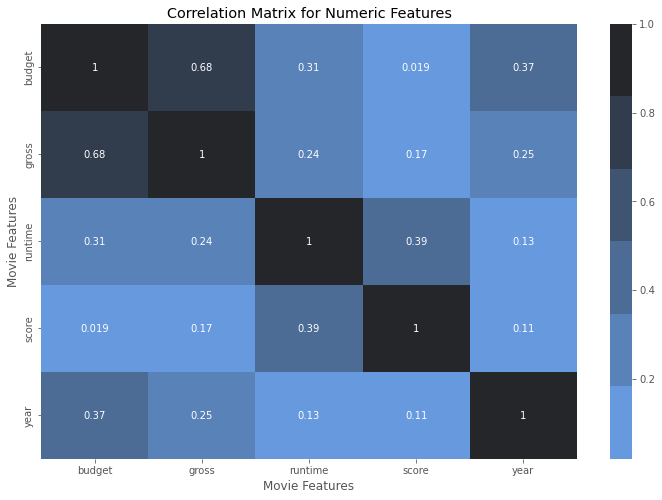

In [68]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, cmap = sns.dark_palette("#69d", reverse=True), annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [17]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,year_correct
budget,1.000000,0.236504,0.047311,0.244272,0.153641,0.298526,0.298566,0.189299,0.218048,0.054969,0.012415,0.245534,0.241367,0.113642,0.091138
company,0.236504,1.000000,0.391707,0.583531,0.123474,0.658463,0.655860,0.353821,0.365345,0.038724,-0.034638,0.538852,0.561633,0.095419,0.119849
country,0.047311,0.391707,1.000000,0.267621,0.019641,0.287590,0.279976,0.214441,0.133947,0.028677,-0.112103,0.288921,0.277295,-0.060593,-0.055057
director,0.244272,0.583531,0.267621,1.000000,0.144234,0.736951,0.732268,0.276979,0.485048,0.065811,0.095826,0.559478,0.700871,0.153424,0.162463
genre,0.153641,0.123474,0.019641,0.144234,1.000000,0.168077,0.171892,0.181061,0.129889,0.004589,0.002743,0.152098,0.141143,0.080040,0.071166
gross,0.298526,0.658463,0.287590,0.736951,0.168077,1.000000,0.993995,0.378010,0.647061,0.080605,0.073108,0.657285,0.799767,0.186975,0.196577
name,0.298566,0.655860,0.279976,0.732268,0.171892,0.993995,1.000000,0.378284,0.641571,0.078257,0.073082,0.653914,0.795751,0.182999,0.191506
rating,0.189299,0.353821,0.214441,0.276979,0.181061,0.378010,0.378284,1.000000,0.262437,0.065218,-0.097882,0.309562,0.314952,0.055503,0.067501
released,0.218048,0.365345,0.133947,0.485048,0.129889,0.647061,0.641571,0.262437,1.000000,0.057348,0.094658,0.424360,0.533373,0.246446,0.263714
runtime,0.054969,0.038724,0.028677,0.065811,0.004589,0.080605,0.078257,0.065218,0.057348,1.000000,0.004172,0.071207,0.035072,0.011545,0.009085


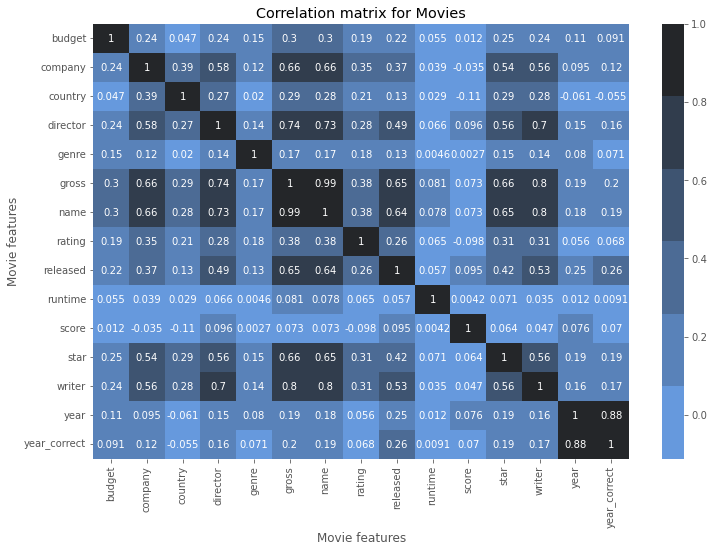

In [18]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, cmap = sns.dark_palette("#69d", reverse=True), annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [19]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

budget        budget          1.000000
              company         0.236504
              country         0.047311
              director        0.244272
              genre           0.153641
                                ...   
year_correct  score           0.070287
              star            0.186646
              writer          0.171111
              year            0.883190
              year_correct    1.000000
Length: 225, dtype: float64


In [20]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country       score          -0.112103
score         country        -0.112103
              rating         -0.097882
rating        score          -0.097882
country       year           -0.060593
                                ...   
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
year_correct  year_correct    1.000000
Length: 225, dtype: float64


In [21]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

writer        released        0.533373
released      writer          0.533373
company       star            0.538852
star          company         0.538852
              director        0.559478
director      star            0.559478
writer        company         0.561633
company       writer          0.561633
star          writer          0.562962
writer        star            0.562962
company       director        0.583531
director      company         0.583531
released      name            0.641571
name          released        0.641571
gross         released        0.647061
released      gross           0.647061
name          star            0.653914
star          name            0.653914
name          company         0.655860
company       name            0.655860
star          gross           0.657285
gross         star            0.657285
              company         0.658463
company       gross           0.658463
writer        director        0.700871
director      writer     

In [22]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              19210654664
Universal Pictures                        16729372116
Paramount Pictures                        14939868110
Twentieth Century Fox Film Corporation    12865103681
Walt Disney Pictures                       8473734032
New Line Cinema                            7440980305
Columbia Pictures                          7318285654
Columbia Pictures Corporation              6745134438
Touchstone Pictures                        5231872389
DreamWorks                                 4993798085
DreamWorks Animation                       3269298790
Pixar Animation Studios                    3118937658
Marvel Studios                             2671642781
Lucasfilm                                  2653975002
Metro-Goldwyn-Mayer (MGM)                  2449247796
Name: gross, dtype: int64

In [23]:
df['Year'] = df['released'].astype(str).str[:4]
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,year_correct,Year
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015,2015,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009,2009,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997,1997,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015,2015,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,Zentropa Entertainments,Denmark,Kristian Levring,Drama,5000,La salvación,R,2015-02-27,92,6.7,Mads Mikkelsen,Anders Thomas Jensen,2014,2015,2015
1074,0,Balboa Entertainment,Denmark,Nicolas Winding Refn,Crime,4440,Pusher,NOT RATED,1996-08-30,105,7.4,Kim Bodnia,Jens Dahl,1996,1996,1996
2311,47000000,Pan Européenne,Belgium,Jaco Van Dormael,Drama,3600,Mr. Nobody,R,2013-09-26,141,7.9,Jared Leto,Jaco Van Dormael,2009,2013,2013
1466,5000000,Copperheart Entertainment,Canada,John Fawcett,Drama,2554,Feroz,UNRATED,2001-05-18,108,6.8,Emily Perkins,Karen Walton,2000,2001,2001


In [24]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                         year           
"DIA" Productions GmbH & Co. KG 2003   26183197
120 Films                       2002     753501
1492 Pictures                   1996   60573641
                                1999   58220776
                                2002  261988482
...                                         ...
Zentropa Entertainments         2012    1546761
                                2013    1112652
                                2014       5000
Zucker Brothers Productions     1998    6940185
micro_scope                     2010    6857096

[1783 rows x 1 columns]

In [25]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                                 year
Universal Pictures                      2015    1375915098
Paramount Pictures                      2011    1366284830
Warner Bros.                            2008    1285747957
Twentieth Century Fox Film Corporation  2009    1147990995
Warner Bros.                            2005    1113574533
                                        2011    1088637875
Walt Disney Pictures                    2010    1075169420
Warner Bros.                            2014    1062468828
                                        2006    1006709847
Universal Pictures                      2013     995896296
Warner Bros.                            2009     988099321
                                        2010     968080428
                                        2013     952783794
Lucasfilm                               2015     936662225
Universal Pictures                      2004     911827135
Name: gross, dtype: int64

In [26]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              19210654664
Universal Pictures                        16729372116
Paramount Pictures                        14939868110
Twentieth Century Fox Film Corporation    12865103681
Walt Disney Pictures                       8473734032
New Line Cinema                            7440980305
Columbia Pictures                          7318285654
Columbia Pictures Corporation              6745134438
Touchstone Pictures                        5231872389
DreamWorks                                 4993798085
DreamWorks Animation                       3269298790
Pixar Animation Studios                    3118937658
Marvel Studios                             2671642781
Lucasfilm                                  2653975002
Metro-Goldwyn-Mayer (MGM)                  2449247796
Name: gross, dtype: int64

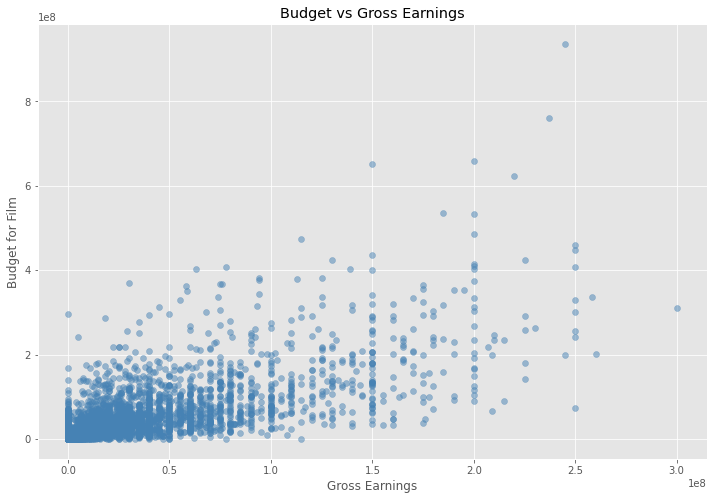

In [28]:
plt.scatter(x=df['budget'], y=df['gross'], c="steelblue", alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

/Users/sawda/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 69.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sawda/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sawda/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 85.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sawda/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sawda/opt/anaconda3/lib/python3.9/site-packages/se

<AxesSubplot:xlabel='rating', ylabel='gross'>

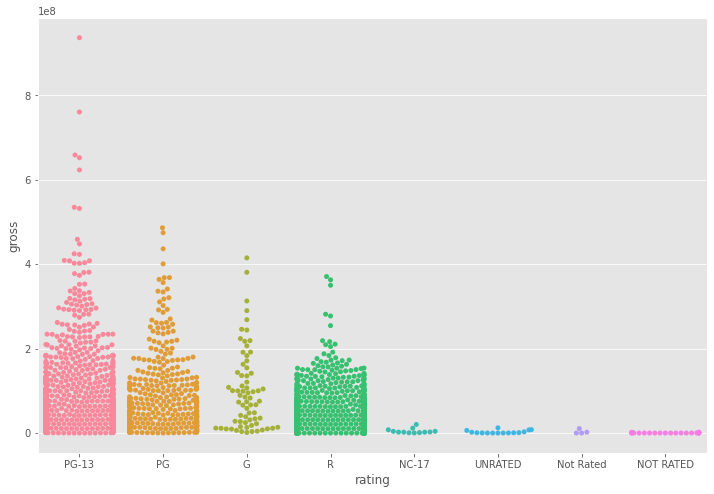

In [46]:
sns.swarmplot(x="rating", y="gross", data=df)

<AxesSubplot:xlabel='rating', ylabel='gross'>

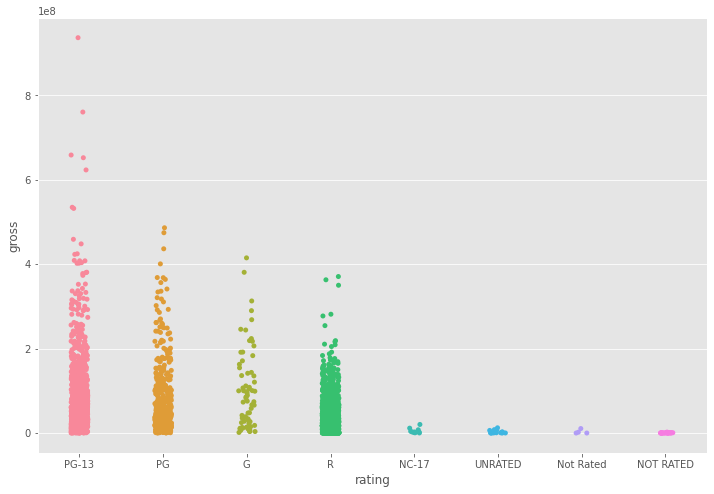

In [48]:
sns.stripplot(x="rating", y="gross", data=df)